<a href="https://colab.research.google.com/github/greenmantice18/Internship-AIML/blob/main/MULTIVARIABLE_REG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MULTI VARIABLE LINEAR REGRESSION**

Using Colab cache for faster access to the 'heart-failure-prediction' dataset.


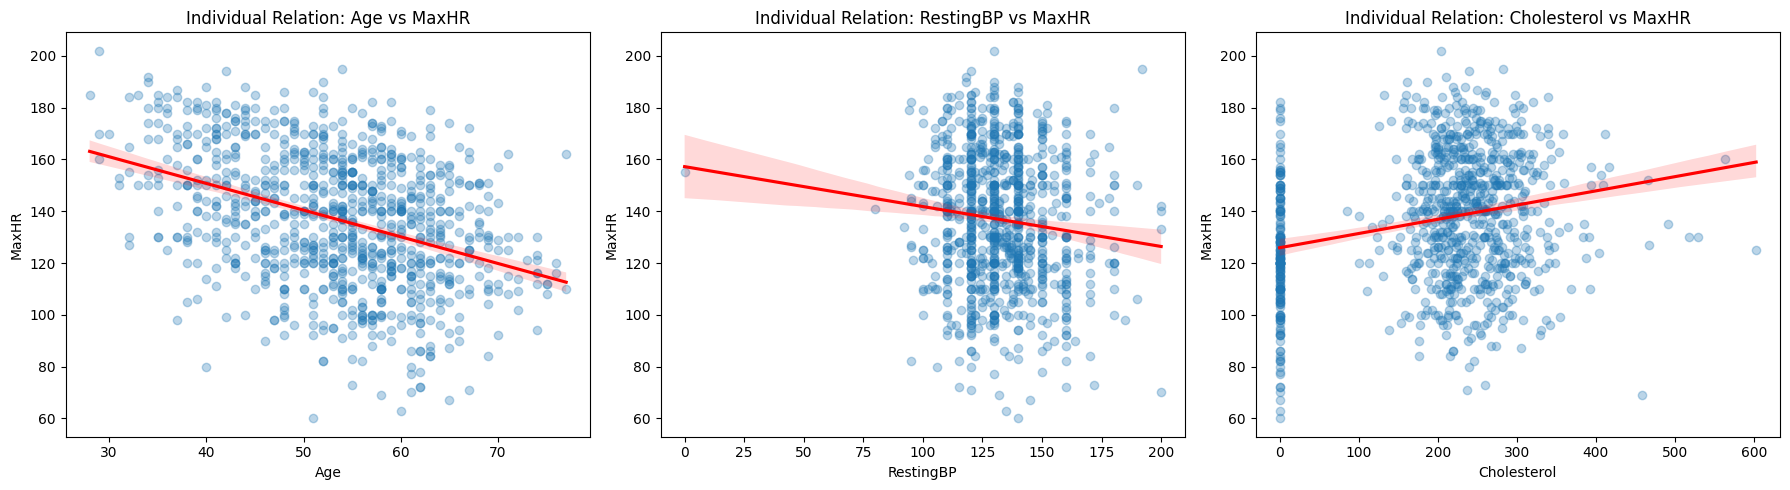

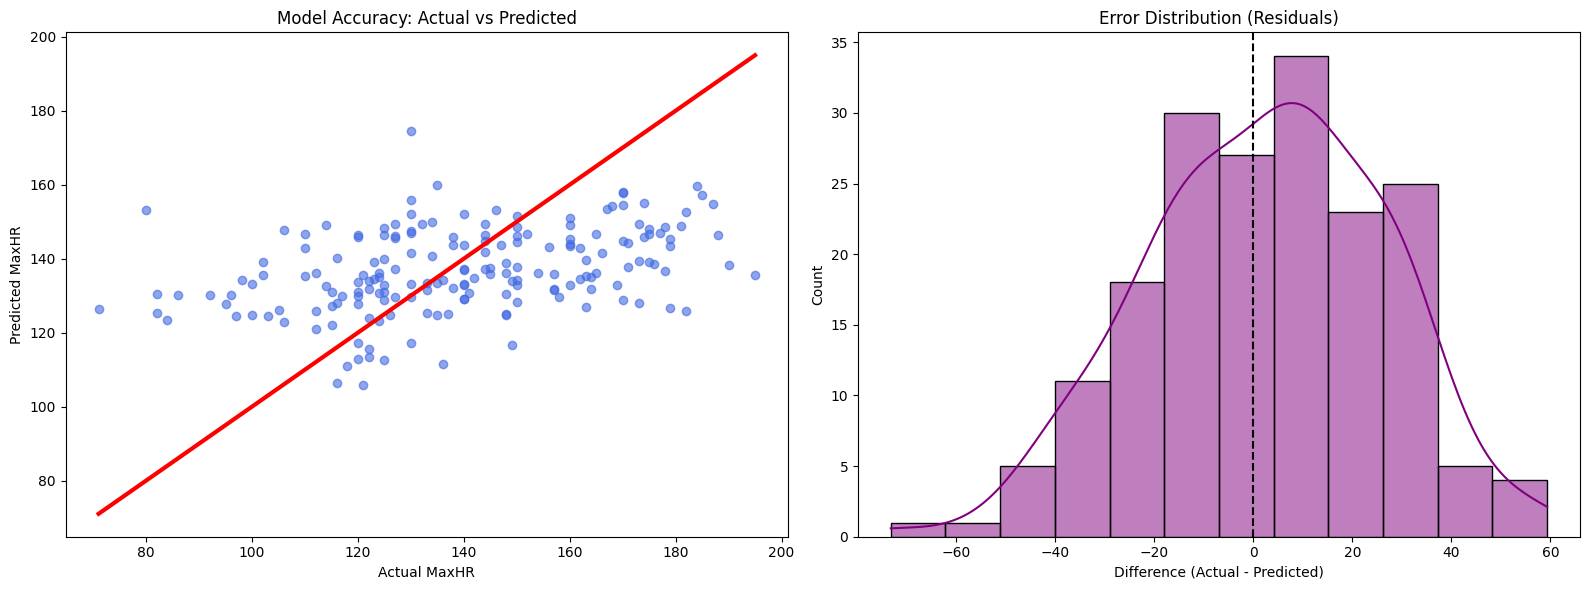

------------------------------
MODEL PERFORMANCE
------------------------------
R-squared Score: 0.1426 (Accuracy level)
Mean Absolute Error: 19.60 beats
RMSE: 23.91 beats
------------------------------
COEFFICIENTS (The weight of each input):
Age: -0.9444
RestingBP: -0.0749
Cholesterol: 0.0507


In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# DATA ACQUISITION ---
path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")
df = pd.read_csv(f"{path}/heart.csv")

# DATA PREPARATION ---

features = ['Age', 'RestingBP', 'Cholesterol']
X = df[features]
y = df['MaxHR']

# EXPLORATORY ANALYSIS (Relation between every X and Y) ---

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(features):
    sns.regplot(x=df[col], y=df['MaxHR'], ax=axes[i], scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
    axes[i].set_title(f'Individual Relation: {col} vs MaxHR')
plt.tight_layout()
plt.show()

# TRAIN-TEST SPLIT ---
# Splitting data so we can test the model on "unseen" examples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL TRAINING ---
model = LinearRegression()
model.fit(X_train, y_train)

#  PREDICTION & ERROR CALCULATION ---
y_pred = model.predict(X_test)

# Calculating the difference (Residuals)
residuals = y_test - y_pred

# Calculating Standard Error Metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = metrics.r2_score(y_test, y_pred)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot A: Actual vs Predicted (The Multi-Regression "Line")
axes[0].scatter(y_test, y_pred, color='royalblue', alpha=0.6)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=3)
axes[0].set_title('Model Accuracy: Actual vs Predicted')
axes[0].set_xlabel('Actual MaxHR')
axes[0].set_ylabel('Predicted MaxHR')

# Plot B: Histogram of Errors (Should be centered around 0)
sns.histplot(residuals, kde=True, ax=axes[1], color='purple')
axes[1].axvline(0, color='black', linestyle='--')
axes[1].set_title('Error Distribution (Residuals)')
axes[1].set_xlabel('Difference (Actual - Predicted)')

plt.tight_layout()
plt.show()

# RESULTS SUMMARY ---
print("-" * 30)
print(f"MODEL PERFORMANCE")
print("-" * 30)
print(f"R-squared Score: {r2:.4f} (Accuracy level)")
print(f"Mean Absolute Error: {mae:.2f} beats")
print(f"RMSE: {rmse:.2f} beats")
print("-" * 30)
print("COEFFICIENTS (The weight of each input):")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.4f}")